# **Exploring Rain in Australia Dataset: A Comprehensive Statistical Analysis**


Hello and welcome! In this notebook, we embark on an extensive statistical analysis of the Rain in Australia dataset, readily accessible on https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. This dataset encompasses a diverse set of variables, including meteorological factors like temperature, humidity, wind speed, and atmospheric pressure, among others. The focal point is the target variable, "RainTomorrow," indicating whether it will rain tomorrow or not. Through the application of various statistical tools and techniques, our objective is to unveil intricate relationships among these variables and rainfall occurrences, providing insights into the underlying patterns that define the weather in Australia.




**Table of Content**


1.Importing Packages

2.Import the dataset

3.Statistical Summary

4.Variable Dispersion

5.Correlation Matrix

5.Hypothesis Testing (Chi-Square Test, T-Test, ANOVA)


# **1. Importing Packages**

In [ ]:

#Loading Libraries
install.packages("forecast")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("stats")
install.packages("nortest")
install.packages("glmnet")
install.packages("tseries")
install.packages("Kendall")
install.packages("e1071")
install.packages("gridExtra")
install.packages("survminer")
install.packages("survival")
install.packages("skimr")
install.packages("corrplot")

library(corrplot)
library(skimr)
library(survival)
library(survminer)
library(gridExtra)
library(e1071)
library(Kendall)
library(tseries)
library(glmnet)
library(stats)
library(nortest)
library(forecast)
library(dplyr)
library(ggplot2)

# **2. Import the dataset**

In [ ]:
weatherAUS = read.csv("/content/sample_data/weatherAUS.csv")

str(weatherAUS)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007

#**3.Statistical Summary**


The dataset consists of 145,460 rows and 23 columns, indicating a substantial amount of data to work with.

Variable Types:
There are two main types of variables in the dataset: character and numeric.
Character variables (7 in total) typically represent categorical or text data, while numeric variables (16 in total) include quantitative measurements.

Character Variables:


*   Date:No missing values, indicating complete data. Consists of 3,436 unique values, suggesting a diverse range of dates.

* Location:No missing values, and 49 unique locations are present.
Useful for analyzing weather patterns across different regions.

* WindGustDir, WindDir9am, WindDir3pm:Some missing values (around 8-10%), but still informative.Each of these variables has 16 unique values, likely representing wind directions.

* RainToday, RainTomorrow:Binary categorical variables indicating whether it rained today and whether it will rain tomorrow.Some missing values, but completeness is around 97.8%.

Here are the interpretations for each numerical column:
1. MinTemp: The average minimum temperature is 12.2°C, ranging from -8.5°C to 33.9°C. The distribution is right-skewed, with 25% of the data below 7.6°C, 50% below 12.0°C, and 75% below 16.9°C.
2. MaxTemp: The average maximum temperature is 23.2°C, ranging from -4.8°C to 48.1°C. The distribution is right-skewed, with 25% of the data below 17.9°C, 50% below 22.6°C, and 75% below 28.2°C.
3. Rainfall: The average rainfall is 2.36 mm, ranging from 0 mm to 371 mm. The distribution is highly right-skewed, with 25% of the data at 0 mm, 50% at 0 mm, and 75% at 0.8 mm.
4. Evaporation: The average evaporation is 5.47 mm, ranging from 0 mm to 145 mm. The distribution is right-skewed, with 25% of the data below 2.6 mm, 50% below 4.8 mm, and 75% below 7.4 mm.
5. Sunshine: The average sunshine duration is 7.61 hours, ranging from 0 hours to 14.5 hours. The distribution is right-skewed, with 25% of the data below 4.8 hours, 50% below 8.4 hours, and 75% below 10.6 hours.
6. WindGustSpeed: The average wind gust speed is 40.0 km/h, ranging from 6 km/h to 135 km/h. The distribution is right-skewed, with 25% of the data below 31 km/h, 50% below 39 km/h, and 75% below 48 km/h.
7. WindSpeed9am: The average wind speed at 9 am is 14.0 km/h, ranging from 0 km/h to 130 km/h. The distribution is right-skewed, with 25% of the data below 7 km/h, 50% below 13 km/h, and 75% below 19 km/h.
8. WindSpeed3pm: The average wind speed at 3 pm is 18.7 km/h, ranging from 0 km/h to 87 km/h. The distribution is right-skewed, with 25% of the data below 13 km/h, 50% below 19 km/h, and 75% below 24 km/h.
9. Humidity9am: The average humidity at 9 am is 68.9%, ranging from 0% to 100%. The distribution is slightly left-skewed, with 25% of the data below 57%, 50% below 70%, and 75% below 83%.
10. Humidity3pm: The average humidity at 3 pm is 51.5%, ranging from 0% to 100%. The distribution is slightly left-skewed, with 25% of the data below 37%, 50% below 52%, and 75% below 66%.
11. Pressure9am: The average atmospheric pressure at 9 am is 1018.0 hPa, ranging from 980.0 hPa to 1041.0 hPa. The distribution is slightly right-skewed, with 25% of the data below 1013.0 hPa, 50% below 1018.0 hPa, and 75% below 1022.0 hPa.
12. Pressure3pm: The average atmospheric pressure at 3 pm is 1015.0 hPa, ranging from 977.0 hPa to 1040.0 hPa. The distribution is slightly right-skewed, with 25% of the data below 1010.0 hPa, 50% below 1015.0 hPa, and 75% below 1020.0 hPa.
13. Cloud9am: The average cloud cover at 9 am is 4.45, ranging from 0 to 9. The distribution is slightly right-skewed, with 25% of the data below 1, 50% below 5, and 75% below 7.
14. Cloud3pm: The average cloud cover at 3 pm is 4.51, ranging from 0 to 9. The distribution is slightly right-skewed, with 25% of the data below 2, 50% below 5, and 75% below 7.
15. Temp9am: The average temperature at 9 am is 17.0°C, ranging from -7.2°C to 40.2°C. The distribution is slightly right-skewed, with 25% of the data below 12.3°C, 50% below 16.7°C, and 75% below 21.6°C.
16. Temp3pm: The average temperature at 3 pm is 21.7°C, ranging from -5.4°C to 46.7°C. The distribution is slightly right-skewed, with 25% of the data below 16.6°C, 50% below 21.1°C, and 75% below 26.4°C.


In [ ]:
# Use skim() to generate a detailed summary
skim_summary <- skim(weatherAUS)

# Print the summary
print(skim_summary)



── Data Summary ────────────────────────
                           Values    
Name                       weatherAUS
Number of rows             145460    
Number of columns          23        
_______________________              
Column type frequency:               
  character                7         
  numeric                  16        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Date                  0         1      10  10     0     3436          0
2 Location              0         1       4  16     0       49          0
3 WindGustDir       10326         0.929   1   3     0       16          0
4 WindDir9am        10566         0.927   1   3     0       16          0
5 WindDir3pm         4228         0.971   1   3     0       16          0
6 RainToday          3261         0.978   2   3     0

# **4.Variables Dispersion**

To analyze the characteristics of numerical variables, three visualization techniques have been used
in this section. Histograms were used to analyze the frequency distribution of values, while
skewness and kurtosis calculations were employed to assess asymmetry and tail heaviness. We
used box plots to find outliers in order to get a better insight on the central tendency and variability
of data. Additionally, QQ-Plots were utilized to assess how the data aligns with a theoretical normal
distribution, helping us detect any deviations from normality, such as skewness. Typically, data
points on the plot should align with a straight line if they adhere to a normal distribution. However,
deviations from this straight line, such as heavy tails or skewness, indicate deviations from the
normal distribution. Statistical analysis of the variables offered valuable insights
into their distribution patterns and characteristics.

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(col)

  # Now:
  data %>% select(all_of(col))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”
Warning message:
“Removed 1485 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1485 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 1485 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 1485 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1261 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1261 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 1261 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 1261 rows containing non-finite values (`stat_boxplot()`).”


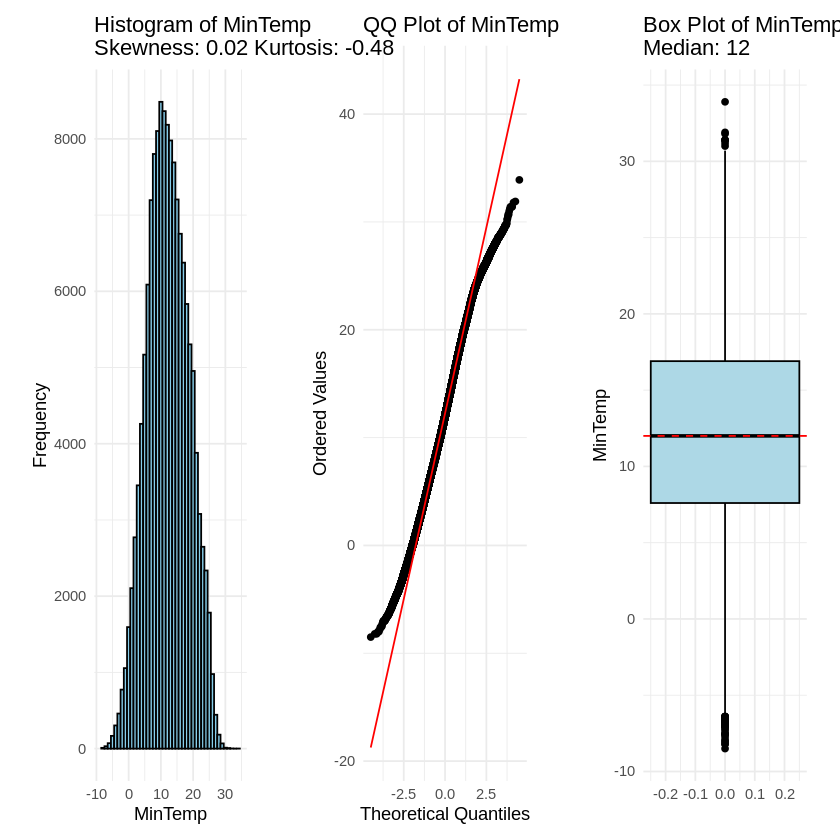

Warning message:
“Removed 3261 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 3261 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 3261 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 3261 rows containing non-finite values (`stat_boxplot()`).”


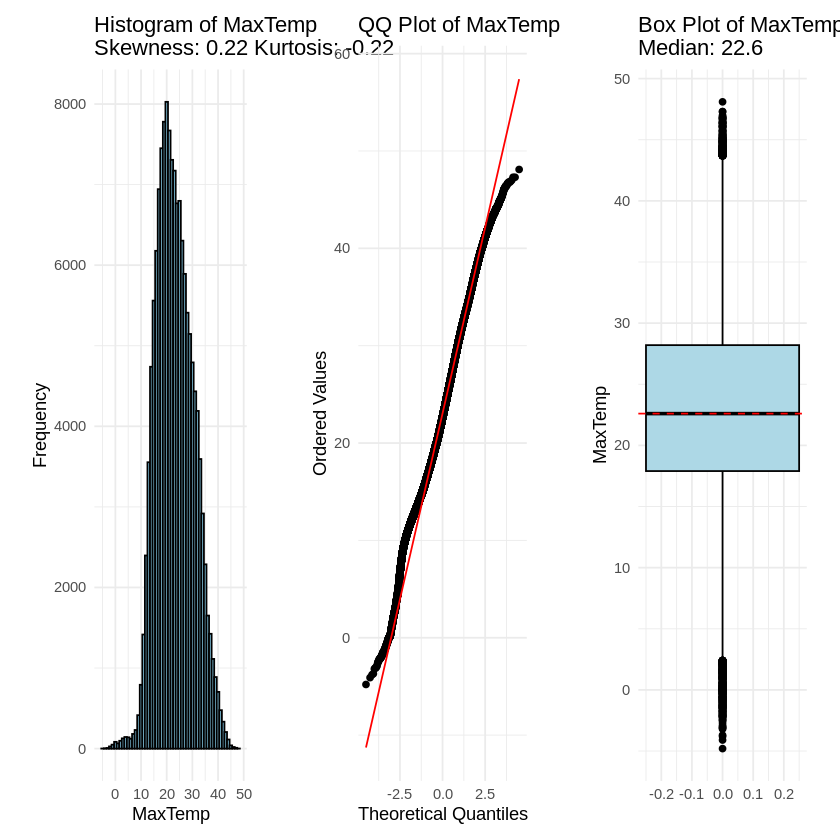

Warning message:
“Removed 62790 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 62790 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 62790 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 62790 rows containing non-finite values (`stat_boxplot()`).”


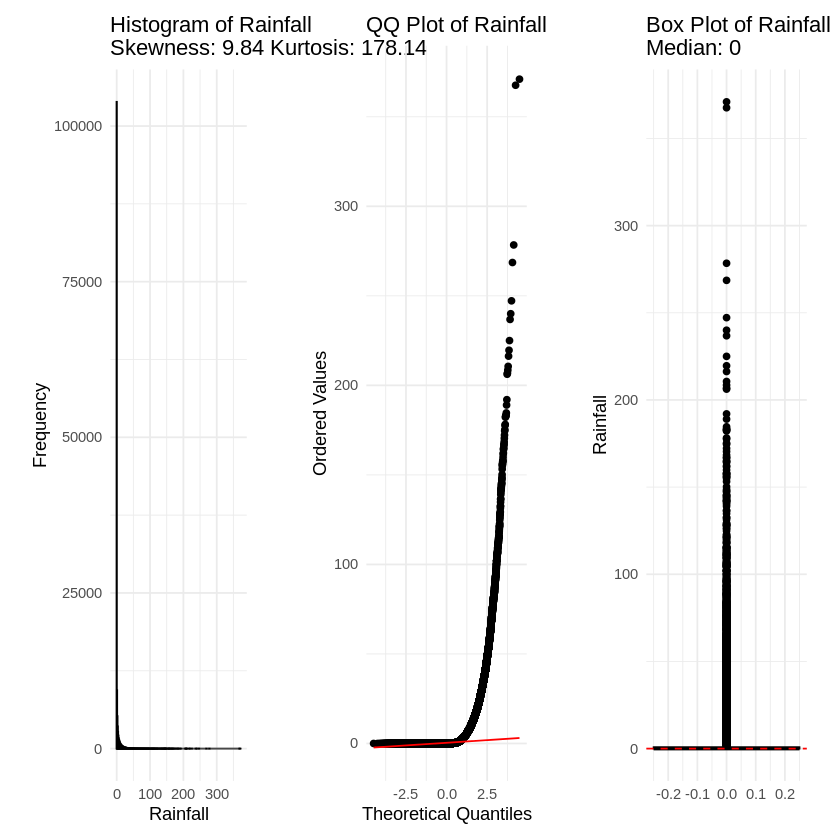

Warning message:
“Removed 69835 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 69835 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 69835 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 69835 rows containing non-finite values (`stat_boxplot()`).”


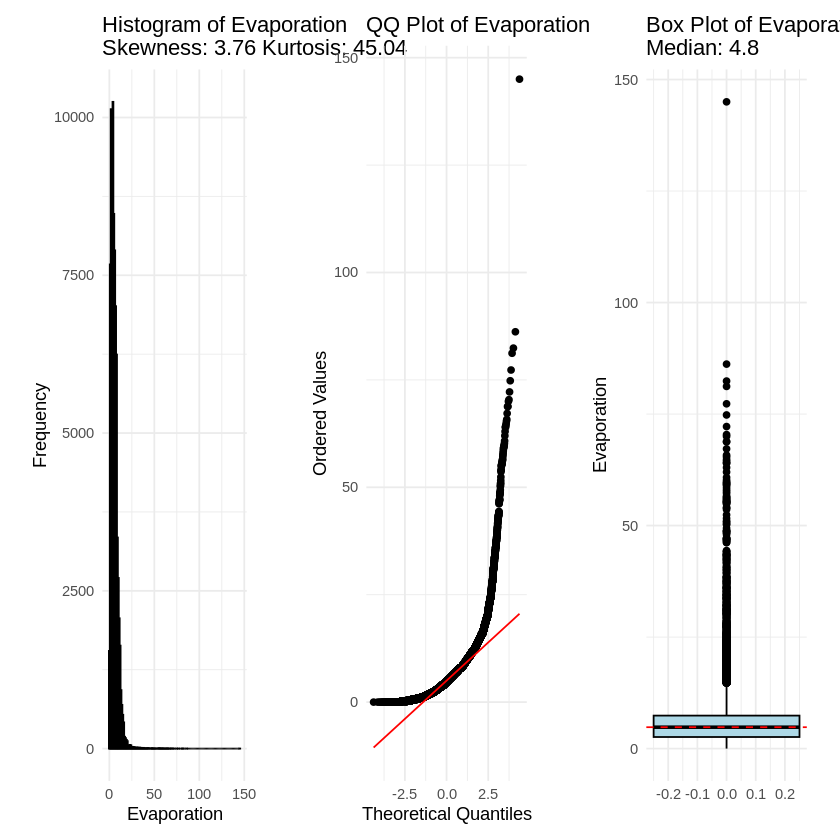

Warning message:
“Removed 10263 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 10263 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 10263 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 10263 rows containing non-finite values (`stat_boxplot()`).”


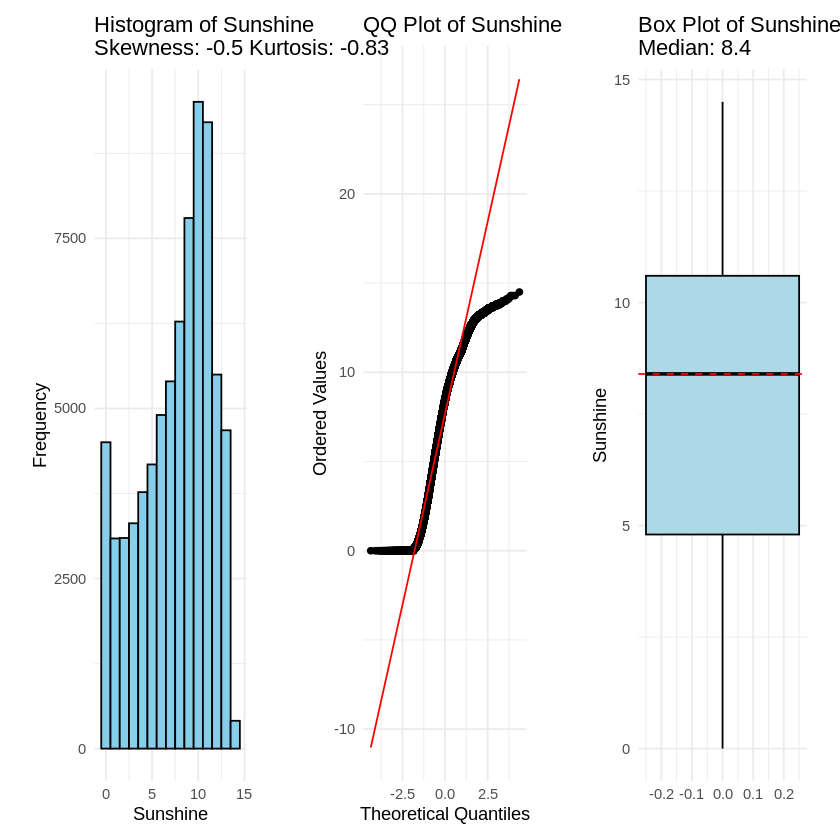

Warning message:
“Removed 1767 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_boxplot()`).”


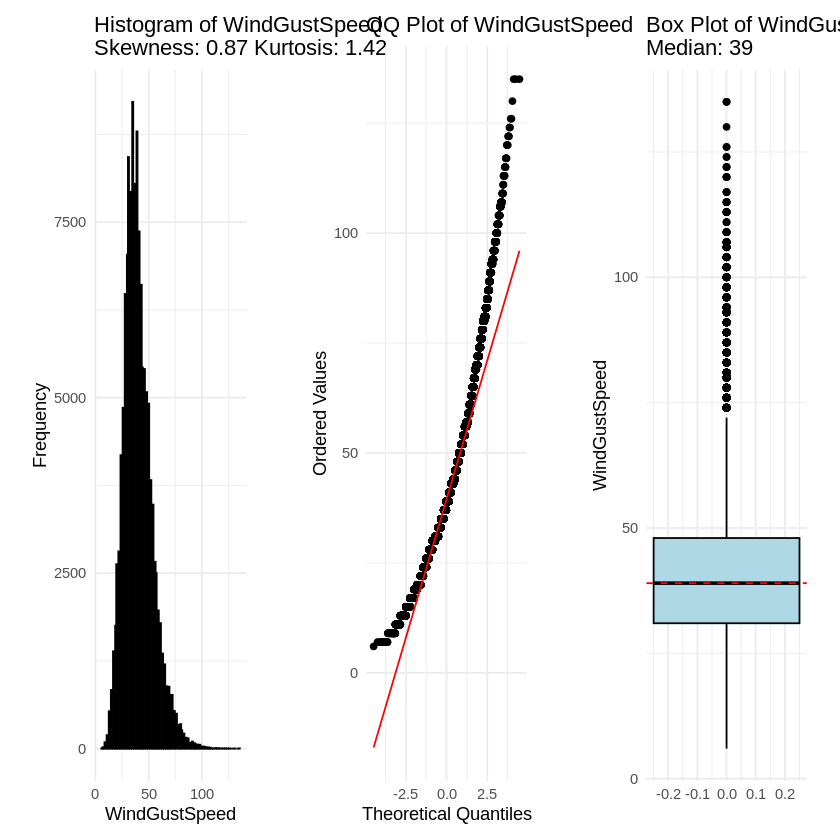

Warning message:
“Removed 3062 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 3062 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 3062 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 3062 rows containing non-finite values (`stat_boxplot()`).”


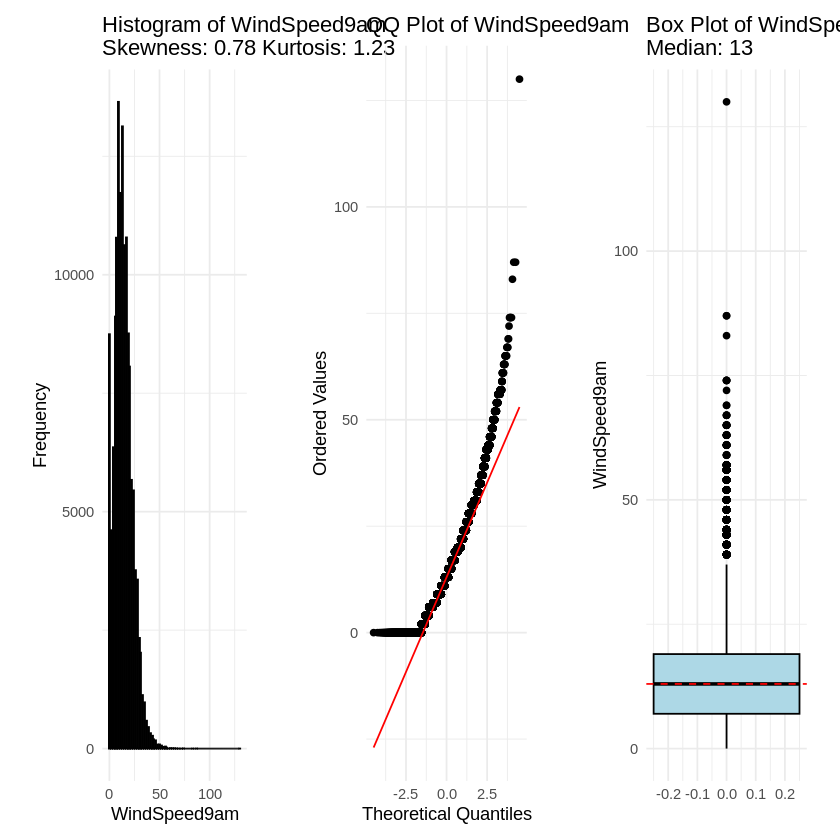

Warning message:
“Removed 2654 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2654 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 2654 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 2654 rows containing non-finite values (`stat_boxplot()`).”


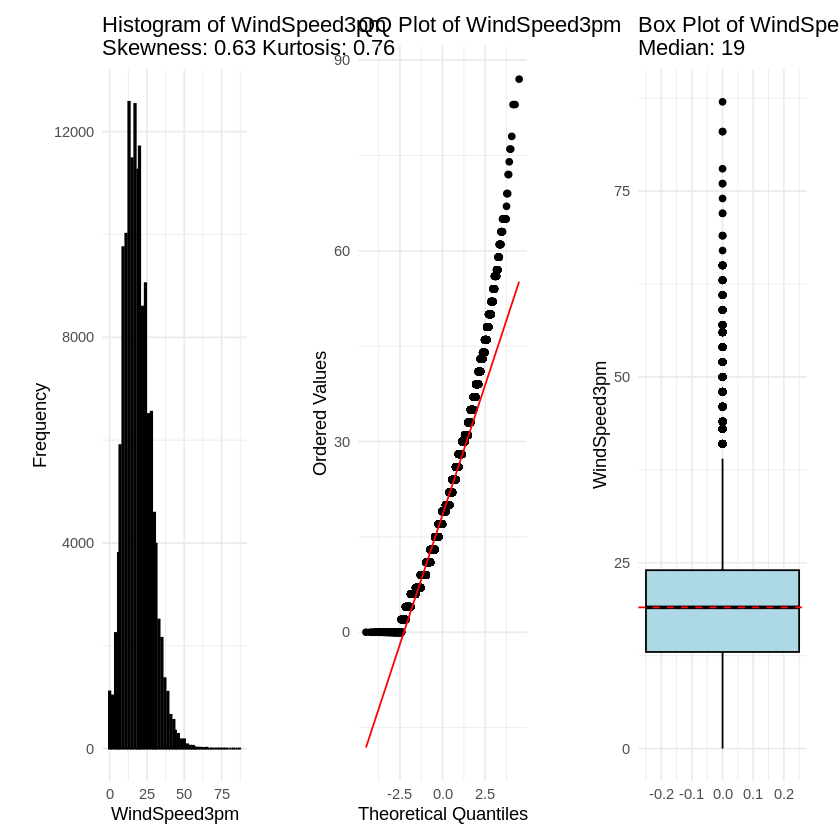

Warning message:
“Removed 4507 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4507 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 4507 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 4507 rows containing non-finite values (`stat_boxplot()`).”


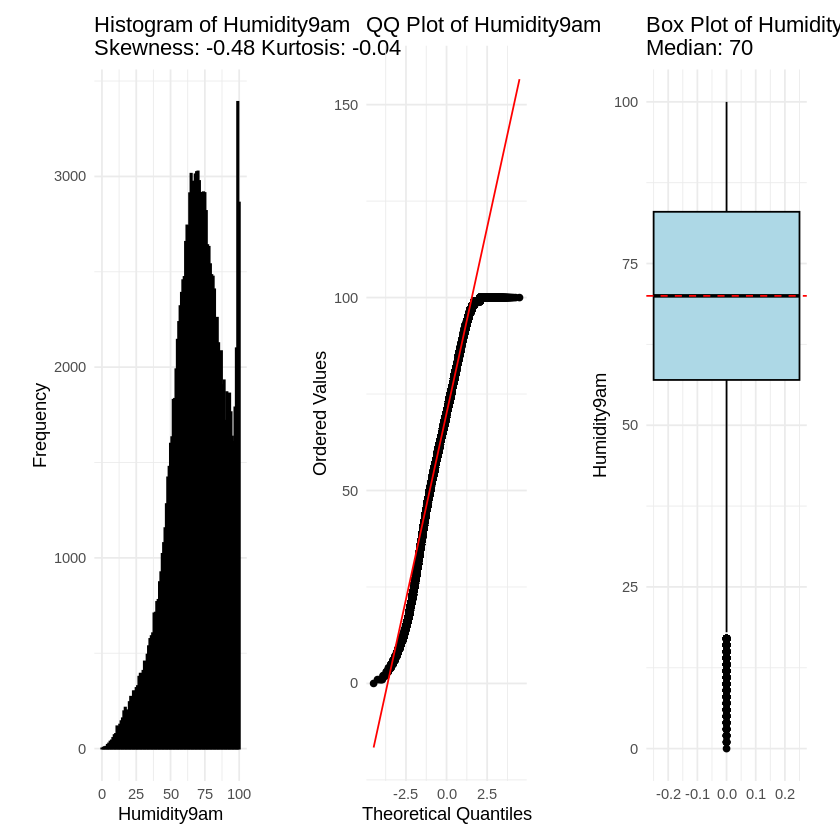

Warning message:
“Removed 15065 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 15065 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 15065 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 15065 rows containing non-finite values (`stat_boxplot()`).”


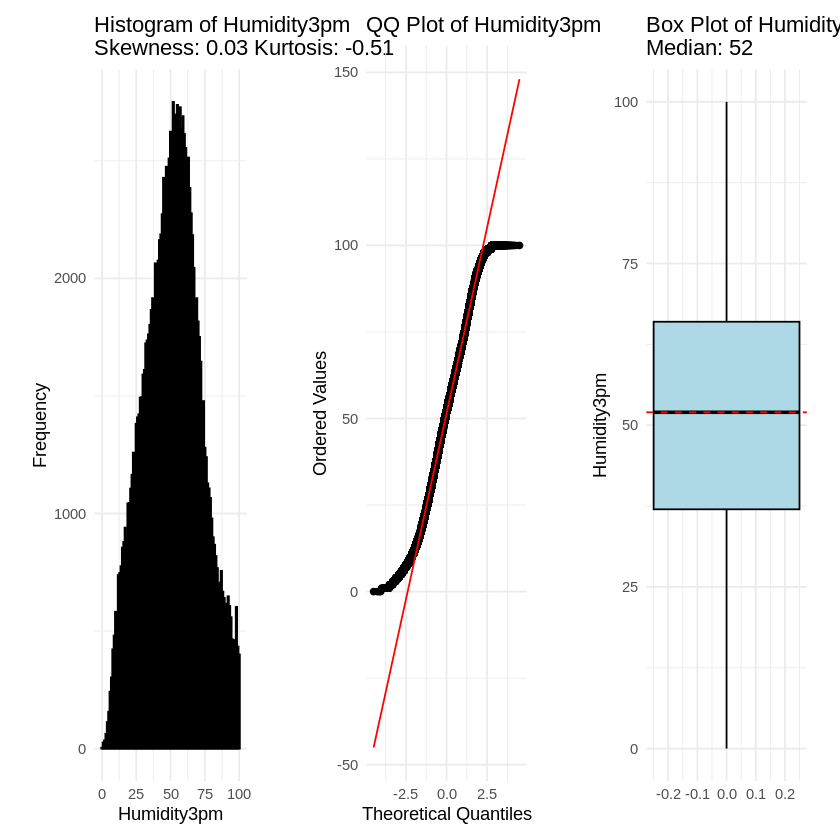

Warning message:
“Removed 15028 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 15028 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 15028 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 15028 rows containing non-finite values (`stat_boxplot()`).”


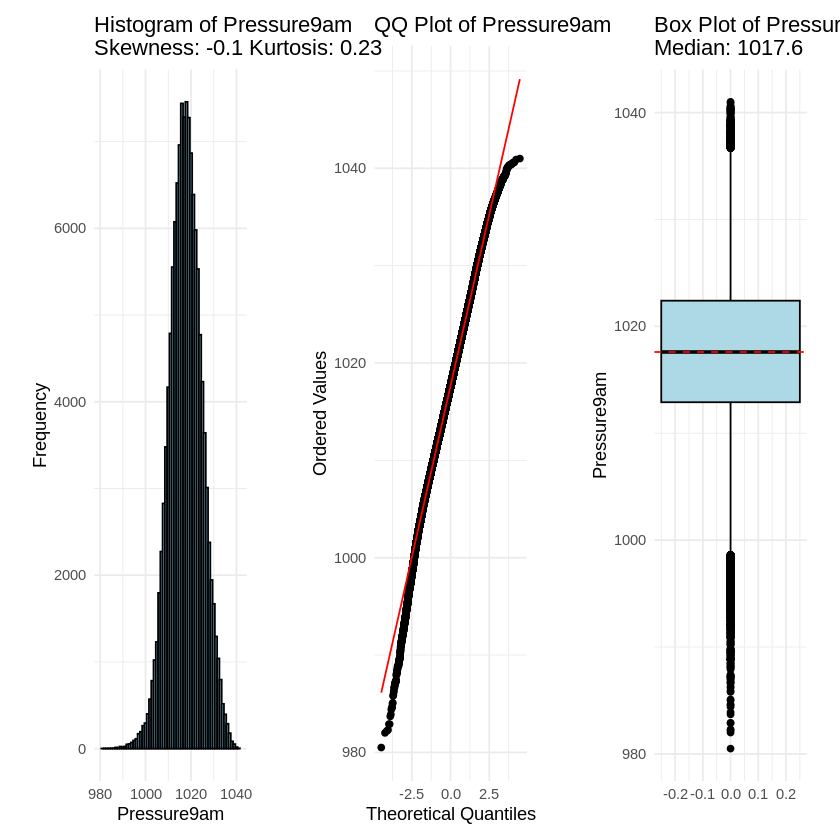

Warning message:
“Removed 55888 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 55888 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 55888 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 55888 rows containing non-finite values (`stat_boxplot()`).”


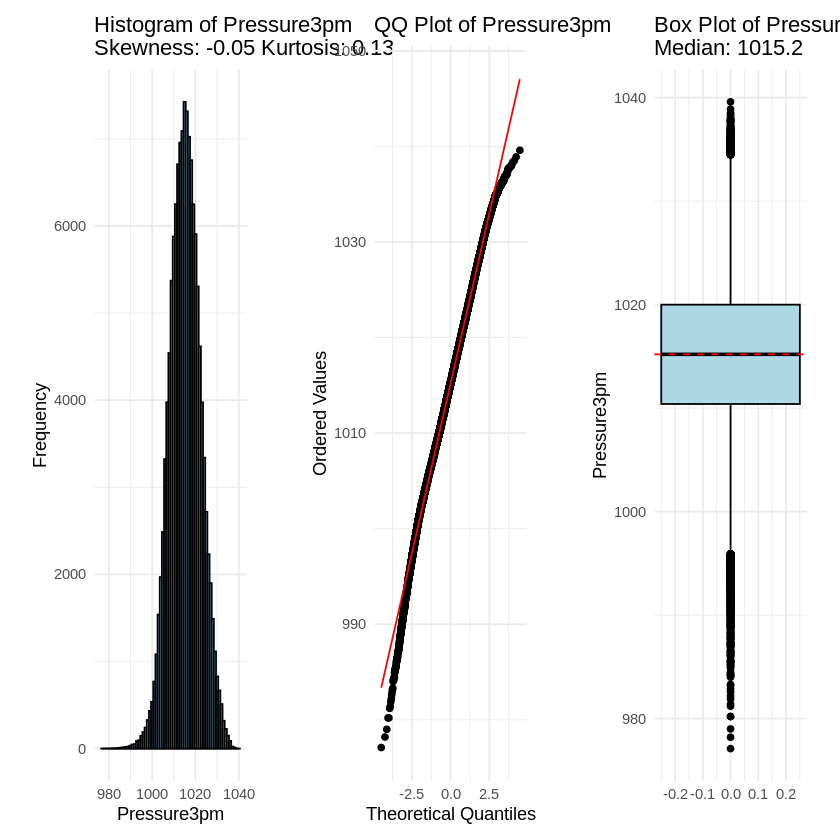

Warning message:
“Removed 59358 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 59358 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 59358 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 59358 rows containing non-finite values (`stat_boxplot()`).”


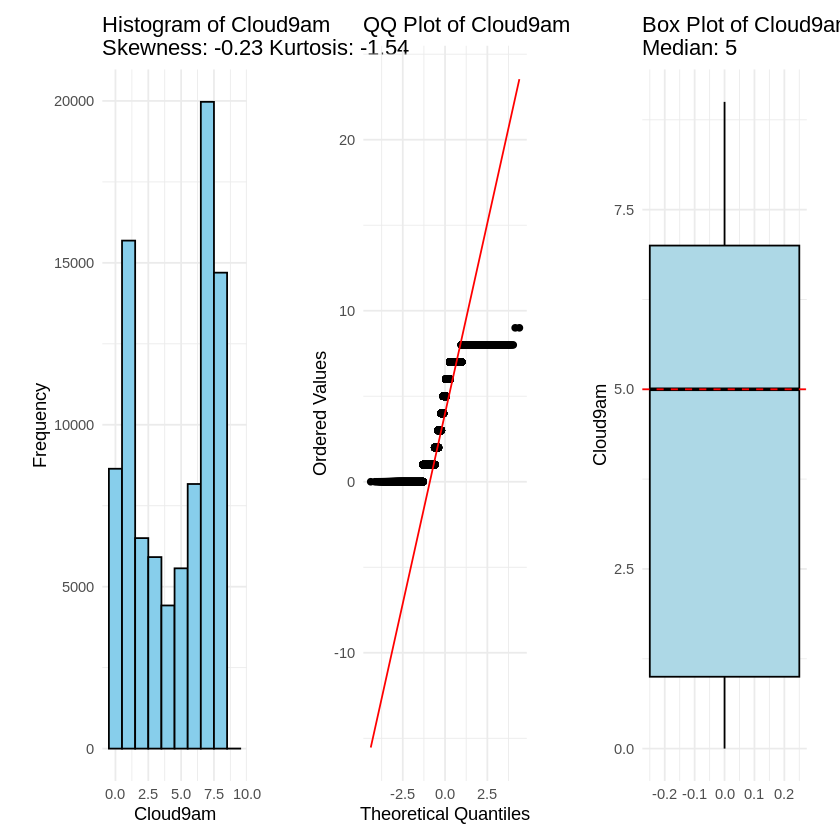

Warning message:
“Removed 1767 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 1767 rows containing non-finite values (`stat_boxplot()`).”


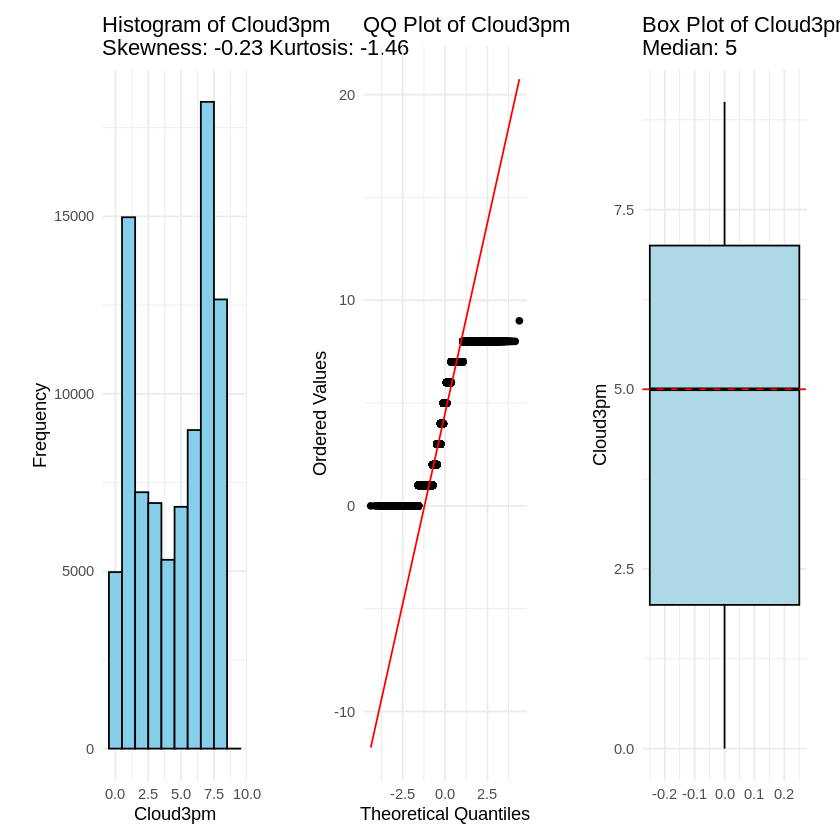

Warning message:
“Removed 3609 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 3609 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 3609 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 3609 rows containing non-finite values (`stat_boxplot()`).”


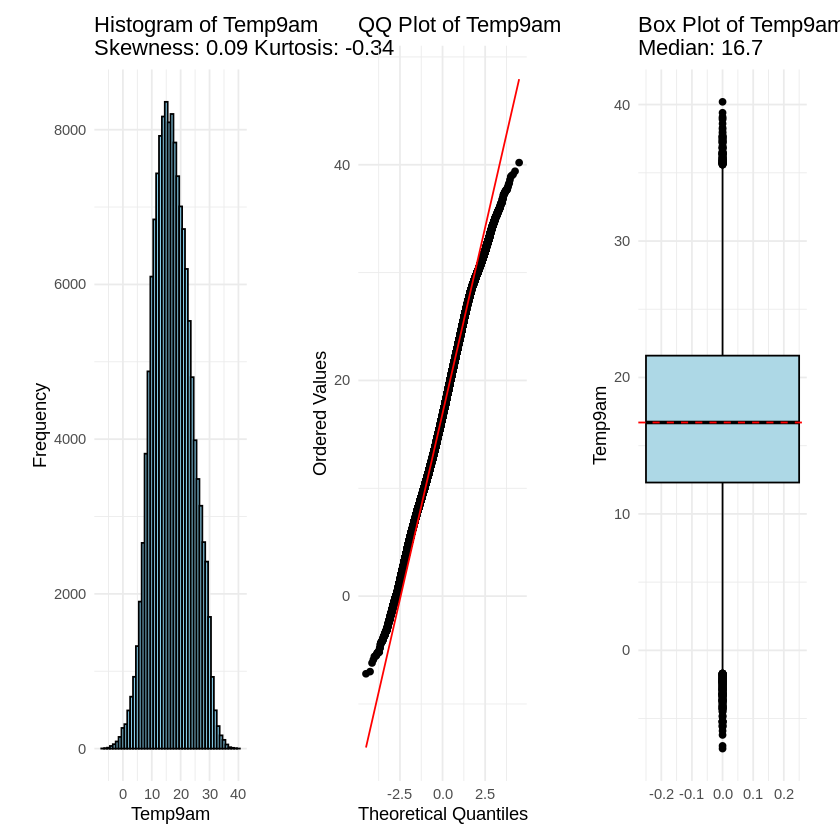

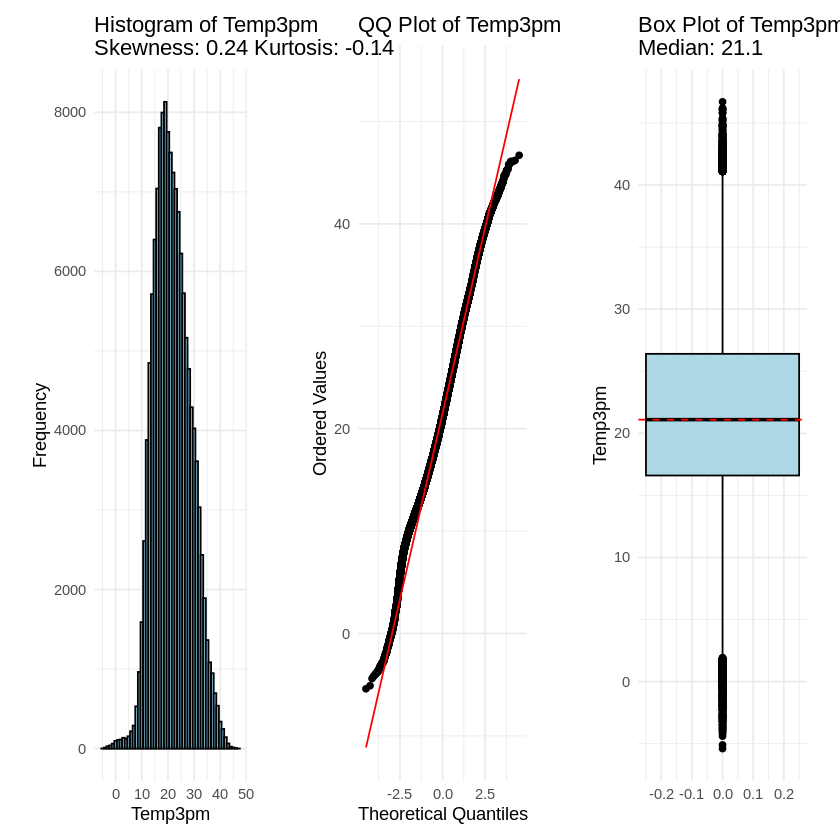

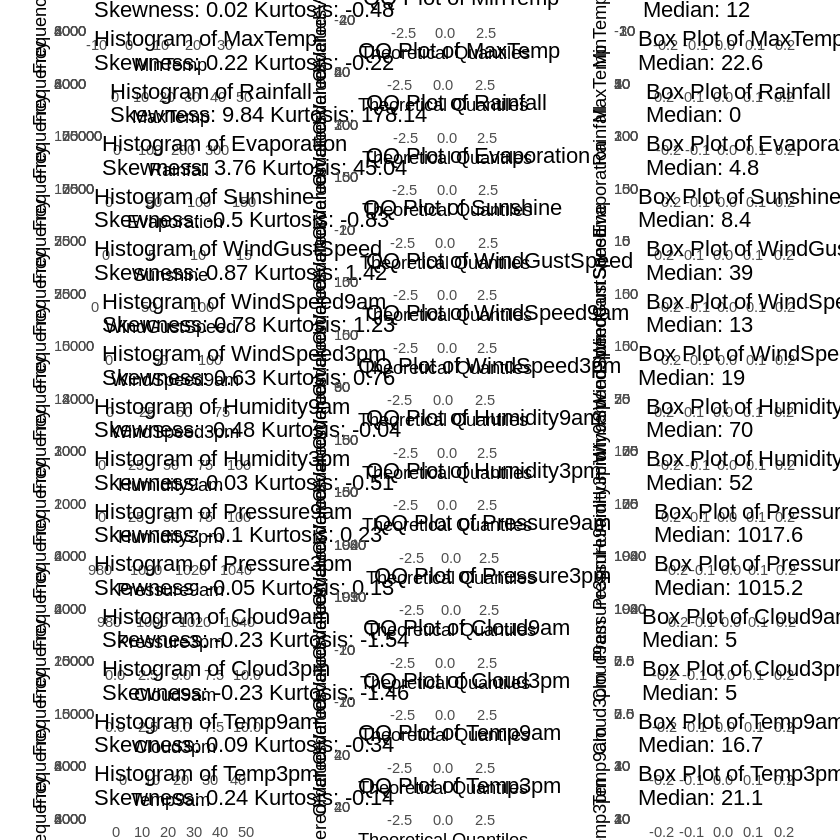

In [ ]:
# Create and display HISTOGRAM, BOX, QQ plots for each numeric column

# Select numeric columns from the dataframe
numeric_columns <- weatherAUS %>%
  select_if(is.numeric)

# Create and display HISTOGRAM, BOX, QQ plots for each numeric column
plot_list <- list()
for (col in colnames(numeric_columns)) {
  col_data <- numeric_columns %>%
    select(col)

  # Calculate skewness and kurtosis
  skew_value <- skewness(col_data[[col]], na.rm = TRUE)
  kurtosis_value <- kurtosis(col_data[[col]], na.rm = TRUE)

  # Histogram plot
  hist_plot <- ggplot(data = col_data, aes(x = .data[[col]])) +
    geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
    labs(title = paste("Histogram of", col, "\nSkewness:", round(skew_value, 2), "Kurtosis:", round(kurtosis_value, 2)),
         x = col, y = "Frequency") +
    theme_minimal() +
    theme(plot.margin = margin(10, 20, 10, 20))

  # QQ plot with normal distribution line
  qq_plot <- ggplot(data = col_data, aes(sample = .data[[col]])) +
    geom_qq() +
    geom_qq_line(color = "red") +
    labs(title = paste("QQ Plot of", col),
         x = "Theoretical Quantiles", y = "Ordered Values") +
    theme_minimal() +
    theme(plot.margin = margin(10, 20, 10, 20))

  # Box plot with median
  box_plot <- ggplot(data = col_data, aes(y = .data[[col]])) +
    geom_boxplot(fill = "lightblue", color = "black", width = 0.5) +
    geom_hline(yintercept = median(col_data[[col]], na.rm = TRUE), color = "red", linetype = "dashed") +
    labs(title = paste("Box Plot of", col, "\nMedian:", round(median(col_data[[col]], na.rm = TRUE), 2)),
         x = "", y = col) +
    theme_minimal() +
    theme(plot.margin = margin(10, 20, 10, 20))

  # Combine histogram, QQ plot, and box plot
  combined_plot <- grid.arrange(hist_plot, qq_plot, box_plot, ncol = 3)

  plot_list[[col]] <- combined_plot

  # Save the combined plot as a PNG file
  png_file_name <- paste0(col, "_plots.png")
  ggsave(png_file_name, plot = combined_plot, width = 12, height = 6)
}

# Display the combined plots
grid.arrange(grobs = plot_list, ncol = 1)


# **5.Correlation Matrix**

In [ ]:

# Convert 'RainToday' to numeric
weatherAUS$RainToday <- as.integer(factor(weatherAUS$RainToday, levels = c("No", "Yes")))


# Convert 'RainTomorrow' to numeric
weatherAUS$RainTomorrow <- as.integer(factor(weatherAUS$RainTomorrow, levels = c("No", "Yes")))


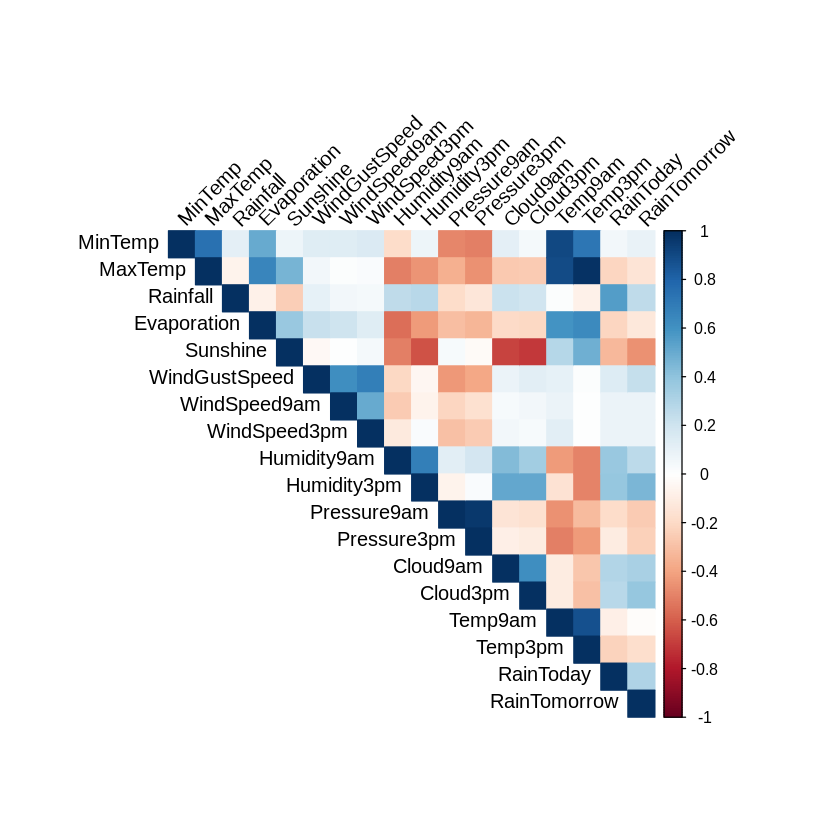

In [ ]:
# Exclude non-numeric columns and convert the remaining ones to numeric
numeric_data <- weatherAUS[, sapply(weatherAUS, is.numeric)]
numeric_data <- as.data.frame(lapply(numeric_data, as.numeric))

# Handle missing values
numeric_data <- na.omit(numeric_data)

# Calculate correlation matrix
correlation_matrix <- cor(numeric_data)

# Create a correlation matrix graph using corrplot
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45)


# **6.Hypothesis Testing**

Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data. It involves formulating a hypothesis about a population parameter, collecting and analyzing data, and drawing conclusions regarding the validity of the hypothesis.


#**Chi-Square Test**

The chi-square (χ²) test is a statistical method used to determine if there is a significant association between two categorical variables. It is particularly useful when dealing with nominal data, where variables are divided into categories without any inherent order.

was the subject of a hypothesis test in this section to evaluate an association between categorical variables and their target variable. In this context, we present both a null and alternative hypothesis, as described below.

**Null Hypothesis (H0):** The categorical variables 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday', and 'Location' do not show any significant association with the occurrence of rainfall the next day (RainTomorrow).

**Alternative Hypothesis (H1):** The categorical variables 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday', and 'Location' show significant association with the occurrence of rainfall the next day (RainTomorrow).



In [ ]:
# Perform chi-square test between RainTomorrow and WindDir9am
contingency_table <- table(weatherAUS$RainTomorrow, weatherAUS$WindDir9am)
chi_square_result <- chisq.test(contingency_table)

print(chi_square_result)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 2214.8, df = 15, p-value < 2.2e-16



In [ ]:
# Perform chi-square test between RainTomorrow and WindDir3pm
contingency_table <- table(weatherAUS$RainTomorrow, weatherAUS$WindDir3pm)
chi_square_result <- chisq.test(contingency_table)

print(chi_square_result)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1281.3, df = 15, p-value < 2.2e-16



In [ ]:
# Perform chi-square test between RainTomorrow and WindGustDir
contingency_table <- table(weatherAUS$RainTomorrow, weatherAUS$WindGustDir)
chi_square_result <- chisq.test(contingency_table)

print(chi_square_result)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1519.9, df = 15, p-value < 2.2e-16



In [ ]:
# Perform chi-square test between RainTomorrow and RainToday
contingency_table <- table(weatherAUS$RainTomorrow, weatherAUS$RainToday)
chi_square_result <- chisq.test(contingency_table)

print(chi_square_result)


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 13799, df = 1, p-value < 2.2e-16



In [ ]:
# Perform chi-square test between RainTomorrow and Location
contingency_table <- table(weatherAUS$RainTomorrow, weatherAUS$Location)
chi_square_result <- chisq.test(contingency_table)

print(chi_square_result)



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 3544.8, df = 48, p-value < 2.2e-16




# **Results:**

The chi-square test was applied to investigate the association between several categorical variables in the dataset. The p-values obtained for WindDir9am, WindDir3pm, WindGustDir, Location, and RainToday were all found to be highly significant, each less than 2.2e-16. This extremely low p-value indicates strong evidence against the null hypothesis of independence, suggesting a significant association between these variables and the occurrence of rainfall. Therefore, we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is a substantial relationship between the mentioned categorical variables and the likelihood of rainfall. This underscores the importance of considering factors like wind direction, location, and whether it rained on the current day when predicting rain occurrences in the Australian weather dataset.

# **T-TEST**


A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It is a parametric test that makes assumptions about the distribution of the data, such as normality. The t-test produces a t-statistic, which is then compared to a critical value or used to calculate a p-value to make a decision about the null hypothesis.

There are several types of t-tests, each suited for different scenarios:

**Independent Samples T-Test:**

Definition: This test is used when comparing the means of two independent groups to determine if they are significantly different from each other.
Scenario: For example, comparing the average scores of two groups of students who underwent different teaching methods.

**Paired Samples T-Test:**

Definition: Also known as a dependent samples t-test, this test is used when comparing the means of two related groups, such as repeated measurements on the same individuals.
Scenario: For instance, testing if there is a significant difference in the blood pressure of individuals before and after a treatment.

**One-Sample T-Test:**

Definition: This test is employed when comparing the mean of a sample to a known value or a theoretical expectation.
Scenario: For example, testing if the average height of a sample of individuals is significantly different from a specified average height.

**Welch's T-Test:**

Definition: Similar to the independent samples t-test, Welch's t-test is used when the assumption of equal variances in the two groups is violated.
Scenario: Useful when dealing with groups of unequal sample sizes or variances.






***To conduct t-tests, we create scenarios using this dataset.***


**1.Research Question:** Does a meaningful variation exist in humidity levels between the morning ("Humidity9am") and afternoon ("Humidity3pm")?

**Null Hypothesis (H₀):** There is no significant change in humidity levels between morning and afternoon.

**Alternative Hypothesis (H₁):** A significant change in humidity levels exists between morning and afternoon.

In [ ]:
# Is there a significant change in humidity between morning ("Humidity9am") and afternoon ("Humidity3pm")?
# Paired t-test
t.test(weatherAUS$Humidity9am, weatherAUS$Humidity3pm, paired = TRUE)



	Paired t-test

data:  weatherAUS$Humidity9am and weatherAUS$Humidity3pm
t = 397.89, df = 140185, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 17.26446 17.43538
sample estimates:
mean difference 
       17.34992 



# **Result of 1st question:**

The paired t-test was conducted on the humidity levels between morning ("Humidity9am") and afternoon ("Humidity3pm") using the "weatherAUS" dataset. Here's an explanation of the results:

**t-statistic:** The calculated t-value is 397.89.

**Degrees of freedom (df):** The degrees of freedom for the test are 140185.

**p-value:** The p-value is less than 2.2e-16, indicating an extremely low probability of observing such results if there were no true difference in the means. This low p-value leads to the rejection of the null hypothesis.

**Alternative hypothesis:** The alternative hypothesis suggests that the true mean difference is not equal to 0.

**Confidence interval:** The 95 percent confidence interval for the mean difference is given as (17.26446, 17.43538).

**Sample estimates:** The mean difference between the morning and afternoon humidity levels is calculated as 17.34992.

**Explanation:**
The extremely low p-value (< 2.2e-16) suggests strong evidence against the null hypothesis, leading to the rejection of the idea that there is no significant difference in humidity levels between morning and afternoon. The confidence interval (17.26446, 17.43538) provides a range within which we are 95 percent confident that the true mean difference lies. The positive mean difference of 17.34992 indicates that, on average, the humidity is significantly higher in the afternoon compared to the morning. These results provide statistical support for a meaningful change in humidity levels between the specified time periods.








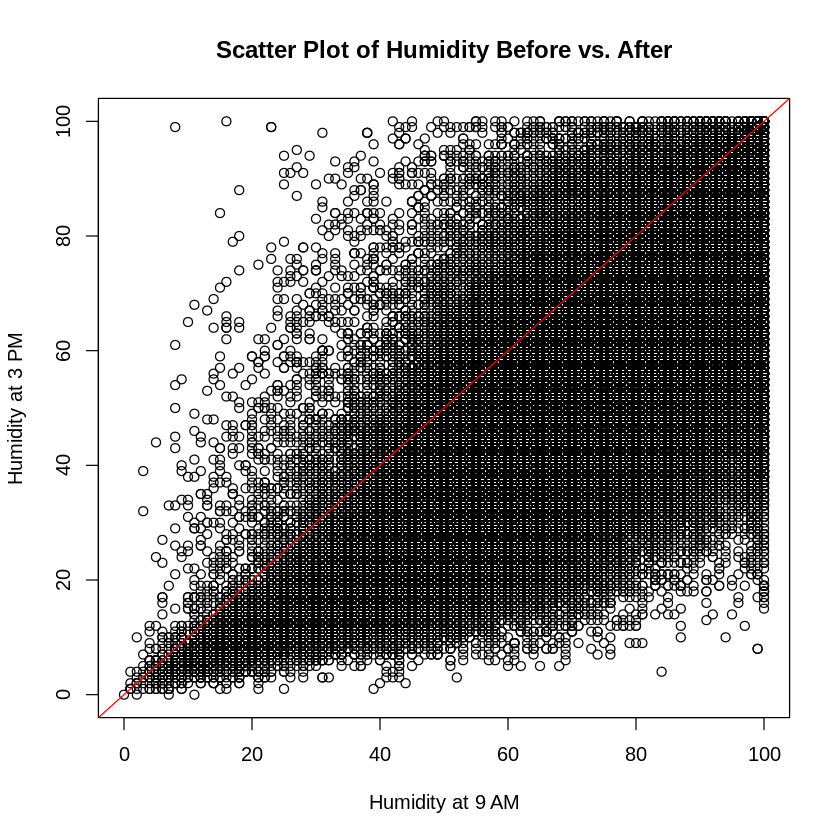

In [ ]:
# Is there a significant change in humidity between morning ("Humidity9am") and afternoon ("Humidity3pm")?
# Create a scatter plot to visualize paired data
plot(weatherAUS$Humidity9am, weatherAUS$Humidity3pm,
     xlab = "Humidity at 9 AM", ylab = "Humidity at 3 PM",
     main = "Scatter Plot of Humidity Before vs. After")

# Add a diagonal line for reference
abline(0, 1, col = "red")



**2.Research Question:** Is there a meaningful difference in evaporation rates between days with rain and days without rain?

**Null Hypothesis (H0):** The evaporation rate is not noticeably different between days with precipitation and days without rainfall.


**Alternative Hypothesis (H1):** The evaporation rate is noticeably different between days with precipitation and days without rainfall.


In [ ]:
# Subset the data for days with rain and days without rain (Is there a significant difference in evaporation between days with rain and days without rain?)
rainy_days <- subset(weatherAUS, RainTomorrow == "Yes")
non_rainy_days <- subset(weatherAUS, RainTomorrow == "No")

# Perform two-sample Independent t-test
t_test_result <- t.test(rainy_days$Evaporation, non_rainy_days$Evaporation, var.equal = TRUE)

print(t_test_result)




	Two Sample t-test

data:  rainy_days$Evaporation and non_rainy_days$Evaporation
t = -34.267, df = 81348, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.276068 -1.137988
sample estimates:
mean of x mean of y 
 4.527779  5.734807 




# **Result of 2nd question:**

The two-sample t-test was performed on the evaporation rates between days with rain and days without rain. Here's an explanation of the results:

**t-statistic:** The calculated t-value is -34.267.

**Degrees of freedom (df):** The degrees of freedom for the test are 81348.

**p-value:** The p-value is less than 2.2e-16, indicating an extremely low probability of observing such results if there were no true difference in the means. This low p-value leads to the rejection of the null hypothesis.

**Alternative hypothesis:** The alternative hypothesis suggests that the true difference in means is not equal to 0.

**Confidence interval:** The 95 percent confidence interval for the difference in means is given as (-1.276068, -1.137988).

**Sample estimates:** The mean evaporation rate for days with rain is 4.527779, and for days without rain, it is 5.734807.

**Explanation:**
The extremely low p-value (< 2.2e-16) provides strong evidence against the null hypothesis, indicating a significant difference in evaporation rates between days with rain and days without rain. The negative t-value (-34.267) aligns with the alternative hypothesis, suggesting that, on average, the evaporation rate is lower on rainy days compared to non-rainy days. The 95 percent confidence interval further supports this, providing a range within which we are 95 percent confident that the true difference in means lies. These results suggest a meaningful distinction in evaporation rates based on the presence or absence of rainfall.

Warning message:
“Removed 60843 rows containing non-finite values (`stat_boxplot()`).”


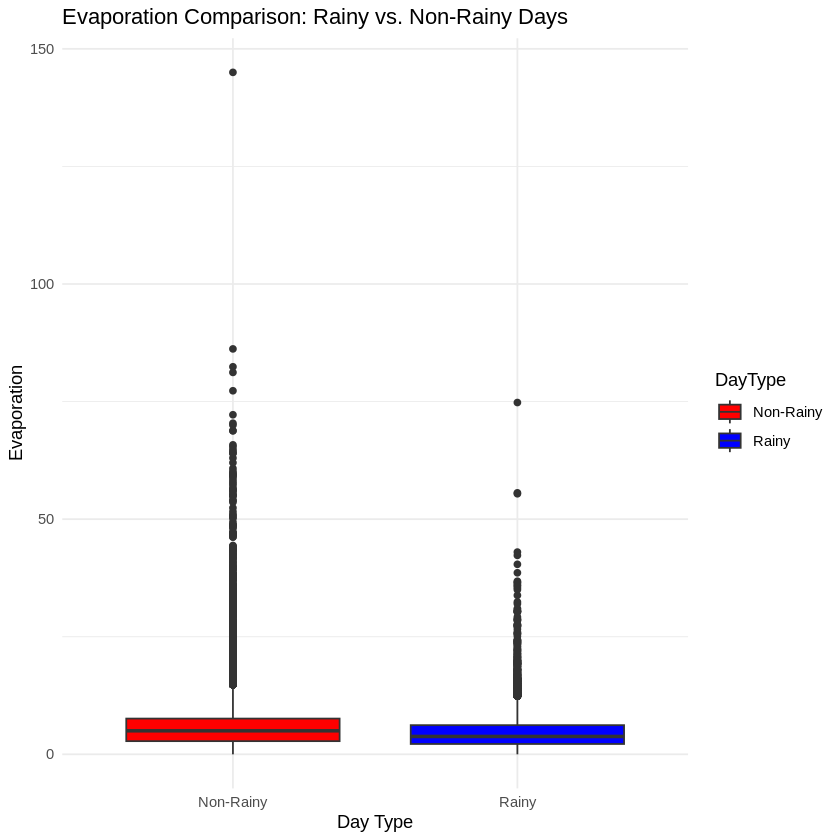

In [ ]:
# Subset the data for days with rain and days without rain (Is there a significant difference in evaporation between days with rain and days without rain?)
# Create a combined data frame for plotting
combined_data <- rbind(data.frame(DayType = "Rainy", Evaporation = rainy_days$Evaporation),
                        data.frame(DayType = "Non-Rainy", Evaporation = non_rainy_days$Evaporation))

# Create a box plot
ggplot(combined_data, aes(x = DayType, y = Evaporation, fill = DayType)) +
  geom_boxplot() +
  labs(title = "Evaporation Comparison: Rainy vs. Non-Rainy Days",
       x = "Day Type",
       y = "Evaporation") +
  scale_fill_manual(values = c("Rainy" = "blue", "Non-Rainy" = "red")) +
  theme_minimal()


#**ANOVA**

ANOVA, or Analysis of Variance, is a statistical method used to analyze the differences among group means in a sample. It assesses whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

Types of ANOVA:

**One-Way ANOVA:** Compares means across three or more groups when there is one independent variable.

**Two-Way ANOVA**: Extends the one-way ANOVA to analyze the influence of two independent variables on the dependent variable.

**Repeated Measures ANOVA:** Used when measurements are taken on the same set of subjects under different conditions or time points.


***To conduct ANOVA, we create scenarios using this dataset.***



**3.Research Question:** Is there a significant difference in the amount of rainfall across different locations?

**Null Hypothesis (H0):** Rainfall amounts ("Rainfall") do not vary significantly across locations (Location").

**Alternative Hypothesis (H1):** Rainfall amounts vary significantly across locations.

In [ ]:
# Does the amount of rainfall significantly differ across different locations?
# Perform one-way ANOVA
aov_result <- aov(Rainfall ~ Location, data = weatherAUS)

# Summarize the ANOVA result
summary(aov_result)

                Df   Sum Sq Mean Sq F value Pr(>F)    
Location        48   180451    3759   53.23 <2e-16 ***
Residuals   142150 10040386      71                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3261 observations deleted due to missingness

# **Result of 3rd question:**

The analysis of variance (ANOVA) results indicates whether there is a significant difference in the amount of rainfall across different locations. Here's an interpretation of the output:

**Degrees of Freedom (Df):** The degrees of freedom for Location is 48, representing the number of groups (locations) minus 1.

**Sum of Squares (Sum Sq):** The total variability in the amount of rainfall across locations is decomposed into two parts: the variability explained by the Location factor (180451) and the residual variability (10040386).

**Mean Square (Mean Sq):** The mean square is calculated by dividing the sum of squares by the degrees of freedom. For Location, it is 3759.

**F Value:** The F value is a ratio of the variability explained by the Location factor to the residual variability. In this case, it is 53.23.

**p-value (Pr(>F)):** The p-value associated with the F value is less than 2e-16, indicating an extremely low probability of observing such results if there were no significant difference in the amount of rainfall across locations.

**Interpretation:** The p-value being highly significant (***), we reject the null hypothesis. This suggests that there is a noteworthy disparity in the amount of rainfall among different locations.

Warning message:
“Removed 3261 rows containing non-finite values (`stat_boxplot()`).”


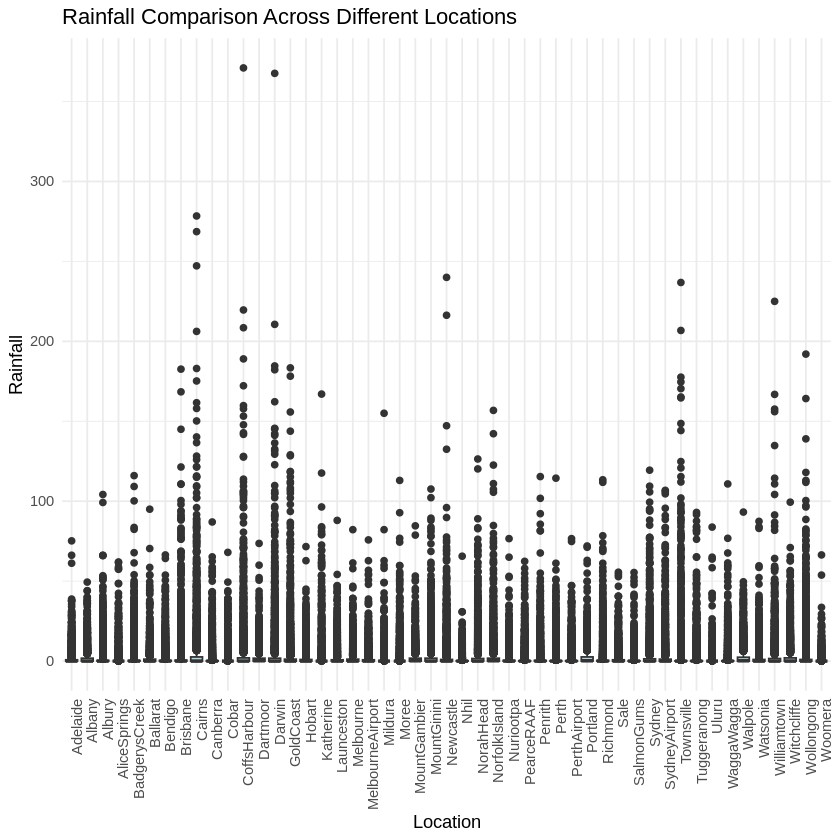

In [ ]:
# Create a box plot
ggplot(weatherAUS, aes(x = Location, y = Rainfall)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Rainfall Comparison Across Different Locations",
       x = "Location",
       y = "Rainfall") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

**4.Research Question:** Is there a significant difference in wind gust speeds across different wind directions?

**Null Hypothesis (H0):** There is no noteworthy disparity in wind gust speeds among various wind directions.

**Alternative Hypothesis (H1):** There is a noteworthy disparity in wind gust speeds among various wind directions.


In [ ]:
# Is there a significant difference in wind gust speeds across different wind directions?
columns <- c('WindGustDir', 'WindGustSpeed')
data_subset <- na.omit(weatherAUS[columns])

# Perform One-Way ANOVA
anova_result <- aov(WindGustSpeed ~ WindGustDir, data = data_subset)
anova_summary <- summary(anova_result)

# Print ANOVA results
print("One-Way ANOVA Results:")
print(anova_summary)

[1] "One-Way ANOVA Results:"
                Df   Sum Sq Mean Sq F value Pr(>F)    
WindGustDir     15  1022091   68139   383.6 <2e-16 ***
Residuals   135118 23998139     178                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#**Result of 4th question:**

One-Way ANOVA Results for Wind Gust Speeds Across Different Wind Directions:

**Degrees of Freedom (Df):**

* For WindGustDir (Wind Directions): 15 degrees of freedom, representing the number of wind direction groups minus 1.
* Residuals: 135118 degrees of freedom, representing the unexplained variability.

**Sum of Squares (Sum Sq):**
* Total sum of squares (variability) in wind gust speeds is 25020230.
* The sum of squares attributed to WindGustDir is 1022091, representing the variability explained by the different wind directions.

**Mean Square (Mean Sq):**

* Mean square is calculated by dividing the sum of squares by the degrees of freedom.
* For WindGustDir: 68139 (1022091 / 15).
* For Residuals: 178 (23998139 / 135118).

**F Value:**

* The F value (383.6) is a ratio of the mean square for WindGustDir to the mean square for Residuals.
* A higher F value suggests a larger difference between group means relative to the variation within groups.

**p-value (Pr(>F)):**

* The p-value associated with the F value is less than 2e-16, an extremely low probability of observing such results if there were no significant difference in wind gust speeds among different wind directions.

**Interpretation**:The highly significant p-value (*** < 0.001) indicates a noteworthy disparity in wind gust speeds among different wind directions.


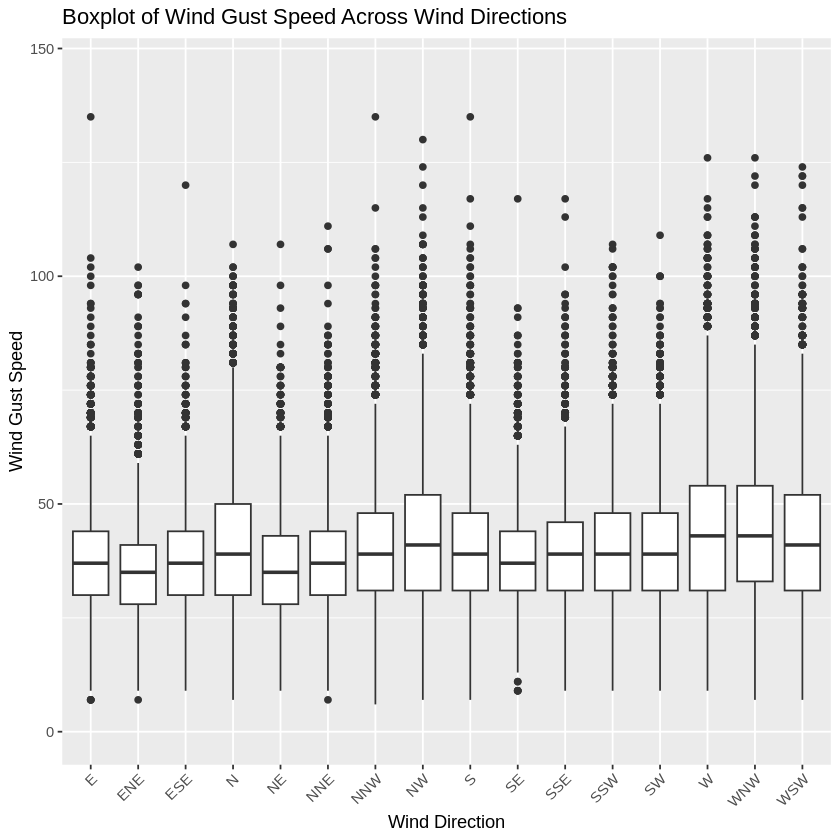

In [ ]:
# Is there a significant difference in wind gust speeds across different wind directions?
# Plot boxplot for WindGustSpeed across different wind directions
ggplot(data_subset, aes(x = WindGustDir, y = WindGustSpeed)) +
  geom_boxplot() +
  labs(title = "Boxplot of Wind Gust Speed Across Wind Directions",
       x = "Wind Direction",
       y = "Wind Gust Speed") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_cartesian(ylim = c(0, max(data_subset$WindGustSpeed) + 10))
